In [2]:
import os
import time
import json
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy import stats
from pylab import rcParams
from sklearn.utils import check_random_state
from sklearn.datasets import load_digits
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, \
    GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Importing random forest model and libraries
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
from sklearn.model_selection import cross_val_score
import scipy as sp
import pickle as pkl
%matplotlib inline

/usr/local/Cellar/python/3.6.4_4/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/local/Cellar/python/3.6.4_4/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/local/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
import pandas as pd
if True:
    df_P100 = pd.read_csv('p100_all_data.csv', index_col = 0)
    df_V100 = pd.read_csv('v100_all_data.csv', index_col = 0)
    new_df = pd.read_csv('new_df.csv', index_col = 0)
    all_data = pd.read_csv('all_data.csv', index_col = 0)
if True:
    all_data = all_data.dropna(axis=1,how='any')

In [4]:
## V100 DATA
df_new = new_df
#Dropping all columns with strings
df_new_norm = df_new.drop(columns=['shared_utilization','stall_other','single_precision_fu_utilization','architecture','input','application_name','kernelname','ipc'])
#p100 only normalized
df_new_ipc = df_new.drop(columns=['shared_utilization','stall_other','single_precision_fu_utilization','architecture','input','application_name','kernelname'])
df_new_ipc = df_new_ipc['ipc']
new_ipc_values = df_new_ipc.values
#p100_ipc_norm = MinMaxScaler().fit_transform(p100_ipc_values)

#no ipc
df_new_norm = df_new.drop(columns=['shared_utilization','stall_other','single_precision_fu_utilization','architecture','input','application_name','kernelname','ipc'])
df_new_norm = df_new_norm.values
df_new_norm = MinMaxScaler().fit_transform(df_new_norm)

# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split
X_new = df_new_norm
Y_new = new_ipc_values

# Split the data up in train and test sets
X_trainnew, X_testnew, y_trainnew, y_testnew = train_test_split(X_new, Y_new, test_size=0.33, random_state=42)



In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

def process(new_def_norm):
    new_def_norm = new_df.drop(columns=['shared_utilization','stall_other','single_precision_fu_utilization','architecture','input','ipc','application_name','kernelname'])

    #v100+p100 combined
    new_def_norm_values = new_def_norm.values
    new_def_norm = MinMaxScaler().fit_transform(new_def_norm_values)

    ###!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!####
    X_VP = new_def_norm 
    Y_VP = new_def_ipc_values

    # Split the data up in train and test sets
    X_trainVP, X_testVP, y_trainVP, y_testVP = train_test_split(X_VP, Y_VP, test_size=0.02, random_state=False)

    # Import `StandardScaler` from `sklearn.preprocessing`
    from sklearn.preprocessing import StandardScaler

    # Define the scaler 
    #scalerVP = StandardScaler().fit(X_trainVP)
    scalerVP = StandardScaler().fit(X_trainVP)

    # Scale the train set
    X_trainVP = scalerVP.transform(X_trainVP)

    # Scale the test set
    X_testVP = scalerVP.transform(X_testVP)
    
    return X_trainVP, X_testVP, y_trainVP, y_testVP, X_VP, Y_VP



In [39]:
#Creating two data sets 
from_scratch = False
df = pd.read_csv('all_data.csv', index_col = 0)
df = df.dropna(axis=1,how='any')
if from_scratch:
    df_check = None
    frames = []
    frame2 = []
    df_v = []
    df_p = []
    for name, item in df.groupby(['kernelname', 'input']):
        df_1 = df[ df['kernelname'] == name[0] ]
        df_2 = df_1[ df_1['input'] == name[1] ]
        if len(df_2) == 2:
            df_v = df_2[df_2['architecture'] == 'V100']
            df_p = df_2[df_2['architecture'] == 'P100']
            #df_p['ipc'][0] = df_v.iloc[0]['ipc']
            frames.append(df_p)
            frame2.append(df_v)

    new_df = pd.concat(frames)
    new_v = pd.concat(frame2)

In [40]:
if from_scratch:
    new_df.to_csv('cor_p100.csv')
    new_v.to_csv('cor_v100.csv')

In [41]:
X_trainP, X_testP, y_trainP, y_testP, X_P, Y_P = process(new_df)
X_trainV, X_testV, y_trainV, y_testV, X_V, Y_V = process(new_v)

In [44]:
#need to create two data sets- one with corresponding p100 runs and another with v100 runs 

print(X_trainP.shape)
print(X_trainV.shape)
#print('\n \n \n \n ---V100--- results \n \n')
#print(new_v['inst_per_warp'])
#print('\n \n \n \n P100 results \n \n')
#print(new_df['inst_per_warp'])


(20170, 112)
(20170, 112)


In [82]:
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility
numpy.random.seed(7)
# load pima indians dataset
#dataset = pd.read_csv("p100_only.csv", delimiter=",").values
# split into input (X) and output (Y) variables
#X = dataset[:,0:8]
#Y = dataset[:,8]
# create model
def my_model():
    model = Sequential()
    """
    #original simple dl model
    model.add(Dense(12, input_dim=112, kernel_initializer='normal',activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(1, activation='relu'))"""
    #early stopping, smaller layers, less layers
    model.add(Dense(120, input_dim=112, kernel_initializer='normal',activation='relu'))
    model.add(Dense(110, activation='relu'))
    #model.add(Dense(100, activation='relu'))
    #model.add(Dense(90, activation='relu'))
    #model.add(Dense(100, activation='relu'))
    #model.add(Dense(110, activation='relu'))
    model.add(Dense(110, activation='relu'))
    model.add(Dense(112, activation=None))
    # Compile model
    #mean absolute percentage error - indicating that we seek to minimize the mean percentage difference between 
    #predicted ipc and the actual ipc
    model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
    # Fit the model
    ## model.fit(X, Y, epochs=10, batch_size=10) ##works

    """
    # evaluate the model
    scores = model.evaluate(X, Y)
    print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))"""
    return model

In [90]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
#early stopping - once validation error stops improving, cut it off
earlystop = EarlyStopping(monitor='val_loss', min_delta=0.00001, patience=100, verbose=1, mode='min')
callbacks=earlystop
p_model = my_model()
mc = ModelCheckpoint('filename.h5', monitor='val_loss', mode='min', verbose=1,save_best_only=True)
#callbacks_list = [earlystop, mc]
p_model.fit(X_trainP, X_trainV, epochs=1000000, batch_size=10000, verbose=1,validation_split=0.7,callbacks=[earlystop,mc])

Train on 6051 samples, validate on 14119 samples
Epoch 1/1000000
6051/6051 [==============================] - 2s 272us/step - loss: 0.9038 - mean_squared_error: 0.9038 - mean_absolute_error: 0.4899 - val_loss: 0.8180 - val_mean_squared_error: 0.8180 - val_mean_absolute_error: 0.4821

Epoch 00001: val_loss improved from inf to 0.81795, saving model to filename.h5
Epoch 2/1000000
6051/6051 [==============================] - 0s 27us/step - loss: 0.8710 - mean_squared_error: 0.8710 - mean_absolute_error: 0.4754 - val_loss: 0.7921 - val_mean_squared_error: 0.7921 - val_mean_absolute_error: 0.4717

Epoch 00002: val_loss improved from 0.81795 to 0.79214, saving model to filename.h5
Epoch 3/1000000
6051/6051 [==============================] - 0s 29us/step - loss: 0.8449 - mean_squared_error: 0.8449 - mean_absolute_error: 0.4652 - val_loss: 0.7703 - val_mean_squared_error: 0.7703 - val_mean_absolute_error: 0.4649

Epoch 00003: val_loss improved from 0.79214 to 0.77031, saving model to filename.


Epoch 00026: val_loss improved from 0.29441 to 0.28147, saving model to filename.h5
Epoch 27/1000000
6051/6051 [==============================] - 0s 22us/step - loss: 0.2808 - mean_squared_error: 0.2808 - mean_absolute_error: 0.2489 - val_loss: 0.2693 - val_mean_squared_error: 0.2693 - val_mean_absolute_error: 0.2465

Epoch 00027: val_loss improved from 0.28147 to 0.26927, saving model to filename.h5
Epoch 28/1000000
6051/6051 [==============================] - 0s 26us/step - loss: 0.2640 - mean_squared_error: 0.2640 - mean_absolute_error: 0.2410 - val_loss: 0.2577 - val_mean_squared_error: 0.2577 - val_mean_absolute_error: 0.2390

Epoch 00028: val_loss improved from 0.26927 to 0.25767, saving model to filename.h5
Epoch 29/1000000
6051/6051 [==============================] - 0s 25us/step - loss: 0.2478 - mean_squared_error: 0.2478 - mean_absolute_error: 0.2334 - val_loss: 0.2467 - val_mean_squared_error: 0.2467 - val_mean_absolute_error: 0.2314

Epoch 00029: val_loss improved from 0.2


Epoch 00052: val_loss improved from 0.11692 to 0.11366, saving model to filename.h5
Epoch 53/1000000
6051/6051 [==============================] - 0s 24us/step - loss: 0.0749 - mean_squared_error: 0.0749 - mean_absolute_error: 0.1202 - val_loss: 0.1104 - val_mean_squared_error: 0.1104 - val_mean_absolute_error: 0.1241

Epoch 00053: val_loss improved from 0.11366 to 0.11042, saving model to filename.h5
Epoch 54/1000000
6051/6051 [==============================] - 0s 26us/step - loss: 0.0725 - mean_squared_error: 0.0725 - mean_absolute_error: 0.1173 - val_loss: 0.1073 - val_mean_squared_error: 0.1073 - val_mean_absolute_error: 0.1212

Epoch 00054: val_loss improved from 0.11042 to 0.10730, saving model to filename.h5
Epoch 55/1000000
6051/6051 [==============================] - 0s 24us/step - loss: 0.0702 - mean_squared_error: 0.0702 - mean_absolute_error: 0.1144 - val_loss: 0.1042 - val_mean_squared_error: 0.1042 - val_mean_absolute_error: 0.1184

Epoch 00055: val_loss improved from 0.1


Epoch 00078: val_loss improved from 0.06043 to 0.05935, saving model to filename.h5
Epoch 79/1000000
6051/6051 [==============================] - 0s 19us/step - loss: 0.0375 - mean_squared_error: 0.0375 - mean_absolute_error: 0.0757 - val_loss: 0.0583 - val_mean_squared_error: 0.0583 - val_mean_absolute_error: 0.0794

Epoch 00079: val_loss improved from 0.05935 to 0.05831, saving model to filename.h5
Epoch 80/1000000
6051/6051 [==============================] - 0s 22us/step - loss: 0.0367 - mean_squared_error: 0.0367 - mean_absolute_error: 0.0747 - val_loss: 0.0573 - val_mean_squared_error: 0.0573 - val_mean_absolute_error: 0.0784

Epoch 00080: val_loss improved from 0.05831 to 0.05731, saving model to filename.h5
Epoch 81/1000000
6051/6051 [==============================] - 0s 27us/step - loss: 0.0360 - mean_squared_error: 0.0360 - mean_absolute_error: 0.0738 - val_loss: 0.0564 - val_mean_squared_error: 0.0564 - val_mean_absolute_error: 0.0775

Epoch 00081: val_loss improved from 0.0


Epoch 00104: val_loss improved from 0.04228 to 0.04184, saving model to filename.h5
Epoch 105/1000000
6051/6051 [==============================] - 0s 21us/step - loss: 0.0232 - mean_squared_error: 0.0232 - mean_absolute_error: 0.0584 - val_loss: 0.0414 - val_mean_squared_error: 0.0414 - val_mean_absolute_error: 0.0618

Epoch 00105: val_loss improved from 0.04184 to 0.04141, saving model to filename.h5
Epoch 106/1000000
6051/6051 [==============================] - 0s 19us/step - loss: 0.0228 - mean_squared_error: 0.0228 - mean_absolute_error: 0.0579 - val_loss: 0.0410 - val_mean_squared_error: 0.0410 - val_mean_absolute_error: 0.0612

Epoch 00106: val_loss improved from 0.04141 to 0.04099, saving model to filename.h5
Epoch 107/1000000
6051/6051 [==============================] - 0s 19us/step - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0574 - val_loss: 0.0406 - val_mean_squared_error: 0.0406 - val_mean_absolute_error: 0.0607

Epoch 00107: val_loss improved from 


Epoch 00130: val_loss improved from 0.03416 to 0.03395, saving model to filename.h5
Epoch 131/1000000
6051/6051 [==============================] - 0s 23us/step - loss: 0.0161 - mean_squared_error: 0.0161 - mean_absolute_error: 0.0475 - val_loss: 0.0337 - val_mean_squared_error: 0.0337 - val_mean_absolute_error: 0.0503

Epoch 00131: val_loss improved from 0.03395 to 0.03374, saving model to filename.h5
Epoch 132/1000000
6051/6051 [==============================] - 0s 35us/step - loss: 0.0159 - mean_squared_error: 0.0159 - mean_absolute_error: 0.0471 - val_loss: 0.0335 - val_mean_squared_error: 0.0335 - val_mean_absolute_error: 0.0500

Epoch 00132: val_loss improved from 0.03374 to 0.03354, saving model to filename.h5
Epoch 133/1000000
6051/6051 [==============================] - 0s 25us/step - loss: 0.0157 - mean_squared_error: 0.0157 - mean_absolute_error: 0.0468 - val_loss: 0.0333 - val_mean_squared_error: 0.0333 - val_mean_absolute_error: 0.0496

Epoch 00133: val_loss improved from 


Epoch 00156: val_loss improved from 0.02974 to 0.02960, saving model to filename.h5
Epoch 157/1000000
6051/6051 [==============================] - 0s 21us/step - loss: 0.0124 - mean_squared_error: 0.0124 - mean_absolute_error: 0.0406 - val_loss: 0.0295 - val_mean_squared_error: 0.0295 - val_mean_absolute_error: 0.0432

Epoch 00157: val_loss improved from 0.02960 to 0.02947, saving model to filename.h5
Epoch 158/1000000
6051/6051 [==============================] - 0s 33us/step - loss: 0.0122 - mean_squared_error: 0.0122 - mean_absolute_error: 0.0405 - val_loss: 0.0293 - val_mean_squared_error: 0.0293 - val_mean_absolute_error: 0.0430

Epoch 00158: val_loss improved from 0.02947 to 0.02934, saving model to filename.h5
Epoch 159/1000000
6051/6051 [==============================] - 0s 25us/step - loss: 0.0121 - mean_squared_error: 0.0121 - mean_absolute_error: 0.0403 - val_loss: 0.0292 - val_mean_squared_error: 0.0292 - val_mean_absolute_error: 0.0428

Epoch 00159: val_loss improved from 


Epoch 00182: val_loss improved from 0.02690 to 0.02681, saving model to filename.h5
Epoch 183/1000000
6051/6051 [==============================] - 0s 32us/step - loss: 0.0100 - mean_squared_error: 0.0100 - mean_absolute_error: 0.0366 - val_loss: 0.0267 - val_mean_squared_error: 0.0267 - val_mean_absolute_error: 0.0390

Epoch 00183: val_loss improved from 0.02681 to 0.02673, saving model to filename.h5
Epoch 184/1000000
6051/6051 [==============================] - 0s 23us/step - loss: 0.0099 - mean_squared_error: 0.0099 - mean_absolute_error: 0.0365 - val_loss: 0.0266 - val_mean_squared_error: 0.0266 - val_mean_absolute_error: 0.0388

Epoch 00184: val_loss improved from 0.02673 to 0.02664, saving model to filename.h5
Epoch 185/1000000
6051/6051 [==============================] - 0s 33us/step - loss: 0.0098 - mean_squared_error: 0.0098 - mean_absolute_error: 0.0364 - val_loss: 0.0266 - val_mean_squared_error: 0.0266 - val_mean_absolute_error: 0.0387

Epoch 00185: val_loss improved from 


Epoch 00208: val_loss improved from 0.02503 to 0.02497, saving model to filename.h5
Epoch 209/1000000
6051/6051 [==============================] - 0s 28us/step - loss: 0.0083 - mean_squared_error: 0.0083 - mean_absolute_error: 0.0339 - val_loss: 0.0249 - val_mean_squared_error: 0.0249 - val_mean_absolute_error: 0.0362

Epoch 00209: val_loss improved from 0.02497 to 0.02492, saving model to filename.h5
Epoch 210/1000000
6051/6051 [==============================] - 0s 26us/step - loss: 0.0083 - mean_squared_error: 0.0083 - mean_absolute_error: 0.0338 - val_loss: 0.0249 - val_mean_squared_error: 0.0249 - val_mean_absolute_error: 0.0361

Epoch 00210: val_loss improved from 0.02492 to 0.02486, saving model to filename.h5
Epoch 211/1000000
6051/6051 [==============================] - 0s 25us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0338 - val_loss: 0.0248 - val_mean_squared_error: 0.0248 - val_mean_absolute_error: 0.0360

Epoch 00211: val_loss improved from 


Epoch 00234: val_loss improved from 0.02373 to 0.02369, saving model to filename.h5
Epoch 235/1000000
6051/6051 [==============================] - 0s 21us/step - loss: 0.0071 - mean_squared_error: 0.0071 - mean_absolute_error: 0.0319 - val_loss: 0.0236 - val_mean_squared_error: 0.0236 - val_mean_absolute_error: 0.0341

Epoch 00235: val_loss improved from 0.02369 to 0.02365, saving model to filename.h5
Epoch 236/1000000
6051/6051 [==============================] - 0s 27us/step - loss: 0.0071 - mean_squared_error: 0.0071 - mean_absolute_error: 0.0319 - val_loss: 0.0236 - val_mean_squared_error: 0.0236 - val_mean_absolute_error: 0.0341

Epoch 00236: val_loss improved from 0.02365 to 0.02360, saving model to filename.h5
Epoch 237/1000000
6051/6051 [==============================] - 0s 27us/step - loss: 0.0071 - mean_squared_error: 0.0071 - mean_absolute_error: 0.0318 - val_loss: 0.0236 - val_mean_squared_error: 0.0236 - val_mean_absolute_error: 0.0340

Epoch 00237: val_loss improved from 


Epoch 00260: val_loss improved from 0.02272 to 0.02268, saving model to filename.h5
Epoch 261/1000000
6051/6051 [==============================] - 0s 28us/step - loss: 0.0062 - mean_squared_error: 0.0062 - mean_absolute_error: 0.0304 - val_loss: 0.0227 - val_mean_squared_error: 0.0227 - val_mean_absolute_error: 0.0326

Epoch 00261: val_loss improved from 0.02268 to 0.02265, saving model to filename.h5
Epoch 262/1000000
6051/6051 [==============================] - 0s 30us/step - loss: 0.0062 - mean_squared_error: 0.0062 - mean_absolute_error: 0.0304 - val_loss: 0.0226 - val_mean_squared_error: 0.0226 - val_mean_absolute_error: 0.0326

Epoch 00262: val_loss improved from 0.02265 to 0.02261, saving model to filename.h5
Epoch 263/1000000
6051/6051 [==============================] - 0s 24us/step - loss: 0.0062 - mean_squared_error: 0.0062 - mean_absolute_error: 0.0303 - val_loss: 0.0226 - val_mean_squared_error: 0.0226 - val_mean_absolute_error: 0.0325

Epoch 00263: val_loss improved from 


Epoch 00620: val_loss improved from 0.01815 to 0.01814, saving model to filename.h5
Epoch 621/1000000
6051/6051 [==============================] - 0s 22us/step - loss: 0.0020 - mean_squared_error: 0.0020 - mean_absolute_error: 0.0201 - val_loss: 0.0182 - val_mean_squared_error: 0.0182 - val_mean_absolute_error: 0.0224

Epoch 00621: val_loss did not improve from 0.01814
Epoch 622/1000000
6051/6051 [==============================] - 0s 19us/step - loss: 0.0020 - mean_squared_error: 0.0020 - mean_absolute_error: 0.0201 - val_loss: 0.0181 - val_mean_squared_error: 0.0181 - val_mean_absolute_error: 0.0223

Epoch 00622: val_loss improved from 0.01814 to 0.01813, saving model to filename.h5
Epoch 623/1000000
6051/6051 [==============================] - 0s 21us/step - loss: 0.0020 - mean_squared_error: 0.0020 - mean_absolute_error: 0.0200 - val_loss: 0.0182 - val_mean_squared_error: 0.0182 - val_mean_absolute_error: 0.0223

Epoch 00623: val_loss did not improve from 0.01813
Epoch 624/1000000



Epoch 00647: val_loss did not improve from 0.01805
Epoch 648/1000000
6051/6051 [==============================] - 0s 22us/step - loss: 0.0019 - mean_squared_error: 0.0019 - mean_absolute_error: 0.0195 - val_loss: 0.0180 - val_mean_squared_error: 0.0180 - val_mean_absolute_error: 0.0218

Epoch 00648: val_loss improved from 0.01805 to 0.01804, saving model to filename.h5
Epoch 649/1000000
6051/6051 [==============================] - 0s 23us/step - loss: 0.0019 - mean_squared_error: 0.0019 - mean_absolute_error: 0.0195 - val_loss: 0.0181 - val_mean_squared_error: 0.0181 - val_mean_absolute_error: 0.0218

Epoch 00649: val_loss did not improve from 0.01804
Epoch 650/1000000
6051/6051 [==============================] - 0s 20us/step - loss: 0.0019 - mean_squared_error: 0.0019 - mean_absolute_error: 0.0195 - val_loss: 0.0180 - val_mean_squared_error: 0.0180 - val_mean_absolute_error: 0.0218

Epoch 00650: val_loss improved from 0.01804 to 0.01803, saving model to filename.h5
Epoch 651/1000000


6051/6051 [==============================] - 0s 20us/step - loss: 0.0018 - mean_squared_error: 0.0018 - mean_absolute_error: 0.0191 - val_loss: 0.0180 - val_mean_squared_error: 0.0180 - val_mean_absolute_error: 0.0215

Epoch 00675: val_loss improved from 0.01798 to 0.01797, saving model to filename.h5
Epoch 676/1000000
6051/6051 [==============================] - 0s 25us/step - loss: 0.0018 - mean_squared_error: 0.0018 - mean_absolute_error: 0.0191 - val_loss: 0.0180 - val_mean_squared_error: 0.0180 - val_mean_absolute_error: 0.0215

Epoch 00676: val_loss did not improve from 0.01797
Epoch 677/1000000
6051/6051 [==============================] - 0s 20us/step - loss: 0.0018 - mean_squared_error: 0.0018 - mean_absolute_error: 0.0191 - val_loss: 0.0180 - val_mean_squared_error: 0.0180 - val_mean_absolute_error: 0.0215

Epoch 00677: val_loss improved from 0.01797 to 0.01796, saving model to filename.h5
Epoch 678/1000000
6051/6051 [==============================] - 0s 25us/step - loss: 0.00

6051/6051 [==============================] - 0s 26us/step - loss: 0.0017 - mean_squared_error: 0.0017 - mean_absolute_error: 0.0188 - val_loss: 0.0179 - val_mean_squared_error: 0.0179 - val_mean_absolute_error: 0.0211

Epoch 00702: val_loss improved from 0.01792 to 0.01791, saving model to filename.h5
Epoch 703/1000000
6051/6051 [==============================] - 0s 29us/step - loss: 0.0017 - mean_squared_error: 0.0017 - mean_absolute_error: 0.0187 - val_loss: 0.0180 - val_mean_squared_error: 0.0180 - val_mean_absolute_error: 0.0211

Epoch 00703: val_loss did not improve from 0.01791
Epoch 704/1000000
6051/6051 [==============================] - 0s 22us/step - loss: 0.0017 - mean_squared_error: 0.0017 - mean_absolute_error: 0.0188 - val_loss: 0.0179 - val_mean_squared_error: 0.0179 - val_mean_absolute_error: 0.0212

Epoch 00704: val_loss improved from 0.01791 to 0.01791, saving model to filename.h5
Epoch 705/1000000
6051/6051 [==============================] - 0s 24us/step - loss: 0.00


Epoch 00729: val_loss did not improve from 0.01787
Epoch 730/1000000
6051/6051 [==============================] - 0s 19us/step - loss: 0.0016 - mean_squared_error: 0.0016 - mean_absolute_error: 0.0184 - val_loss: 0.0179 - val_mean_squared_error: 0.0179 - val_mean_absolute_error: 0.0208

Epoch 00730: val_loss improved from 0.01787 to 0.01787, saving model to filename.h5
Epoch 731/1000000
6051/6051 [==============================] - 0s 24us/step - loss: 0.0016 - mean_squared_error: 0.0016 - mean_absolute_error: 0.0184 - val_loss: 0.0179 - val_mean_squared_error: 0.0179 - val_mean_absolute_error: 0.0208

Epoch 00731: val_loss did not improve from 0.01787
Epoch 732/1000000
6051/6051 [==============================] - 0s 20us/step - loss: 0.0016 - mean_squared_error: 0.0016 - mean_absolute_error: 0.0184 - val_loss: 0.0179 - val_mean_squared_error: 0.0179 - val_mean_absolute_error: 0.0208

Epoch 00732: val_loss improved from 0.01787 to 0.01786, saving model to filename.h5
Epoch 733/1000000



Epoch 00757: val_loss improved from 0.01782 to 0.01782, saving model to filename.h5
Epoch 758/1000000
6051/6051 [==============================] - 0s 22us/step - loss: 0.0016 - mean_squared_error: 0.0016 - mean_absolute_error: 0.0181 - val_loss: 0.0179 - val_mean_squared_error: 0.0179 - val_mean_absolute_error: 0.0205

Epoch 00758: val_loss did not improve from 0.01782
Epoch 759/1000000
6051/6051 [==============================] - 0s 21us/step - loss: 0.0016 - mean_squared_error: 0.0016 - mean_absolute_error: 0.0181 - val_loss: 0.0178 - val_mean_squared_error: 0.0178 - val_mean_absolute_error: 0.0205

Epoch 00759: val_loss improved from 0.01782 to 0.01782, saving model to filename.h5
Epoch 760/1000000
6051/6051 [==============================] - 0s 21us/step - loss: 0.0016 - mean_squared_error: 0.0016 - mean_absolute_error: 0.0181 - val_loss: 0.0179 - val_mean_squared_error: 0.0179 - val_mean_absolute_error: 0.0204

Epoch 00760: val_loss did not improve from 0.01782
Epoch 761/1000000



Epoch 00785: val_loss did not improve from 0.01778
Epoch 786/1000000
6051/6051 [==============================] - 0s 21us/step - loss: 0.0015 - mean_squared_error: 0.0015 - mean_absolute_error: 0.0178 - val_loss: 0.0178 - val_mean_squared_error: 0.0178 - val_mean_absolute_error: 0.0202

Epoch 00786: val_loss did not improve from 0.01778
Epoch 787/1000000
6051/6051 [==============================] - 0s 23us/step - loss: 0.0015 - mean_squared_error: 0.0015 - mean_absolute_error: 0.0178 - val_loss: 0.0178 - val_mean_squared_error: 0.0178 - val_mean_absolute_error: 0.0202

Epoch 00787: val_loss improved from 0.01778 to 0.01778, saving model to filename.h5
Epoch 788/1000000
6051/6051 [==============================] - 0s 25us/step - loss: 0.0015 - mean_squared_error: 0.0015 - mean_absolute_error: 0.0178 - val_loss: 0.0178 - val_mean_squared_error: 0.0178 - val_mean_absolute_error: 0.0202

Epoch 00788: val_loss did not improve from 0.01778
Epoch 789/1000000
6051/6051 [======================


Epoch 00813: val_loss improved from 0.01775 to 0.01774, saving model to filename.h5
Epoch 814/1000000
6051/6051 [==============================] - 0s 24us/step - loss: 0.0014 - mean_squared_error: 0.0014 - mean_absolute_error: 0.0174 - val_loss: 0.0178 - val_mean_squared_error: 0.0178 - val_mean_absolute_error: 0.0198

Epoch 00814: val_loss did not improve from 0.01774
Epoch 815/1000000
6051/6051 [==============================] - 0s 20us/step - loss: 0.0014 - mean_squared_error: 0.0014 - mean_absolute_error: 0.0174 - val_loss: 0.0177 - val_mean_squared_error: 0.0177 - val_mean_absolute_error: 0.0198

Epoch 00815: val_loss improved from 0.01774 to 0.01774, saving model to filename.h5
Epoch 816/1000000
6051/6051 [==============================] - 0s 25us/step - loss: 0.0014 - mean_squared_error: 0.0014 - mean_absolute_error: 0.0174 - val_loss: 0.0178 - val_mean_squared_error: 0.0178 - val_mean_absolute_error: 0.0198

Epoch 00816: val_loss did not improve from 0.01774
Epoch 817/1000000



Epoch 00841: val_loss improved from 0.01770 to 0.01769, saving model to filename.h5
Epoch 842/1000000
6051/6051 [==============================] - 0s 27us/step - loss: 0.0014 - mean_squared_error: 0.0014 - mean_absolute_error: 0.0175 - val_loss: 0.0178 - val_mean_squared_error: 0.0178 - val_mean_absolute_error: 0.0199

Epoch 00842: val_loss did not improve from 0.01769
Epoch 843/1000000
6051/6051 [==============================] - 0s 19us/step - loss: 0.0014 - mean_squared_error: 0.0014 - mean_absolute_error: 0.0175 - val_loss: 0.0177 - val_mean_squared_error: 0.0177 - val_mean_absolute_error: 0.0198

Epoch 00843: val_loss improved from 0.01769 to 0.01768, saving model to filename.h5
Epoch 844/1000000
6051/6051 [==============================] - 0s 27us/step - loss: 0.0014 - mean_squared_error: 0.0014 - mean_absolute_error: 0.0174 - val_loss: 0.0178 - val_mean_squared_error: 0.0178 - val_mean_absolute_error: 0.0198

Epoch 00844: val_loss did not improve from 0.01768
Epoch 845/1000000


6051/6051 [==============================] - 0s 25us/step - loss: 0.0013 - mean_squared_error: 0.0013 - mean_absolute_error: 0.0169 - val_loss: 0.0177 - val_mean_squared_error: 0.0177 - val_mean_absolute_error: 0.0193

Epoch 00869: val_loss did not improve from 0.01764
Epoch 870/1000000
6051/6051 [==============================] - 0s 20us/step - loss: 0.0013 - mean_squared_error: 0.0013 - mean_absolute_error: 0.0169 - val_loss: 0.0176 - val_mean_squared_error: 0.0176 - val_mean_absolute_error: 0.0192

Epoch 00870: val_loss did not improve from 0.01764
Epoch 871/1000000
6051/6051 [==============================] - 0s 21us/step - loss: 0.0013 - mean_squared_error: 0.0013 - mean_absolute_error: 0.0168 - val_loss: 0.0177 - val_mean_squared_error: 0.0177 - val_mean_absolute_error: 0.0192

Epoch 00871: val_loss did not improve from 0.01764
Epoch 872/1000000
6051/6051 [==============================] - 0s 20us/step - loss: 0.0013 - mean_squared_error: 0.0013 - mean_absolute_error: 0.0168 - va

6051/6051 [==============================] - 0s 23us/step - loss: 0.0013 - mean_squared_error: 0.0013 - mean_absolute_error: 0.0168 - val_loss: 0.0177 - val_mean_squared_error: 0.0177 - val_mean_absolute_error: 0.0193

Epoch 00897: val_loss did not improve from 0.01761
Epoch 898/1000000
6051/6051 [==============================] - 0s 20us/step - loss: 0.0013 - mean_squared_error: 0.0013 - mean_absolute_error: 0.0168 - val_loss: 0.0176 - val_mean_squared_error: 0.0176 - val_mean_absolute_error: 0.0193

Epoch 00898: val_loss did not improve from 0.01761
Epoch 899/1000000
6051/6051 [==============================] - 0s 19us/step - loss: 0.0013 - mean_squared_error: 0.0013 - mean_absolute_error: 0.0169 - val_loss: 0.0177 - val_mean_squared_error: 0.0177 - val_mean_absolute_error: 0.0193

Epoch 00899: val_loss did not improve from 0.01761
Epoch 900/1000000
6051/6051 [==============================] - 0s 22us/step - loss: 0.0013 - mean_squared_error: 0.0013 - mean_absolute_error: 0.0169 - va


Epoch 00924: val_loss did not improve from 0.01756
Epoch 925/1000000
6051/6051 [==============================] - 0s 22us/step - loss: 0.0013 - mean_squared_error: 0.0013 - mean_absolute_error: 0.0167 - val_loss: 0.0176 - val_mean_squared_error: 0.0176 - val_mean_absolute_error: 0.0191

Epoch 00925: val_loss did not improve from 0.01756
Epoch 926/1000000
6051/6051 [==============================] - 0s 20us/step - loss: 0.0013 - mean_squared_error: 0.0013 - mean_absolute_error: 0.0166 - val_loss: 0.0176 - val_mean_squared_error: 0.0176 - val_mean_absolute_error: 0.0190

Epoch 00926: val_loss did not improve from 0.01756
Epoch 927/1000000
6051/6051 [==============================] - 0s 19us/step - loss: 0.0013 - mean_squared_error: 0.0013 - mean_absolute_error: 0.0166 - val_loss: 0.0176 - val_mean_squared_error: 0.0176 - val_mean_absolute_error: 0.0189

Epoch 00927: val_loss did not improve from 0.01756
Epoch 928/1000000
6051/6051 [==============================] - 0s 29us/step - loss: 


Epoch 00952: val_loss did not improve from 0.01751
Epoch 953/1000000
6051/6051 [==============================] - 0s 22us/step - loss: 0.0012 - mean_squared_error: 0.0012 - mean_absolute_error: 0.0164 - val_loss: 0.0175 - val_mean_squared_error: 0.0175 - val_mean_absolute_error: 0.0188

Epoch 00953: val_loss improved from 0.01751 to 0.01751, saving model to filename.h5
Epoch 954/1000000
6051/6051 [==============================] - 0s 20us/step - loss: 0.0012 - mean_squared_error: 0.0012 - mean_absolute_error: 0.0164 - val_loss: 0.0176 - val_mean_squared_error: 0.0176 - val_mean_absolute_error: 0.0188

Epoch 00954: val_loss did not improve from 0.01751
Epoch 955/1000000
6051/6051 [==============================] - 0s 18us/step - loss: 0.0012 - mean_squared_error: 0.0012 - mean_absolute_error: 0.0164 - val_loss: 0.0175 - val_mean_squared_error: 0.0175 - val_mean_absolute_error: 0.0188

Epoch 00955: val_loss improved from 0.01751 to 0.01750, saving model to filename.h5
Epoch 956/1000000



Epoch 00980: val_loss improved from 0.01748 to 0.01747, saving model to filename.h5
Epoch 981/1000000
6051/6051 [==============================] - 0s 24us/step - loss: 0.0012 - mean_squared_error: 0.0012 - mean_absolute_error: 0.0159 - val_loss: 0.0175 - val_mean_squared_error: 0.0175 - val_mean_absolute_error: 0.0183

Epoch 00981: val_loss did not improve from 0.01747
Epoch 982/1000000
6051/6051 [==============================] - 0s 16us/step - loss: 0.0012 - mean_squared_error: 0.0012 - mean_absolute_error: 0.0159 - val_loss: 0.0175 - val_mean_squared_error: 0.0175 - val_mean_absolute_error: 0.0183

Epoch 00982: val_loss did not improve from 0.01747
Epoch 983/1000000
6051/6051 [==============================] - 0s 20us/step - loss: 0.0012 - mean_squared_error: 0.0012 - mean_absolute_error: 0.0159 - val_loss: 0.0175 - val_mean_squared_error: 0.0175 - val_mean_absolute_error: 0.0183

Epoch 00983: val_loss did not improve from 0.01747
Epoch 984/1000000
6051/6051 [======================


Epoch 01008: val_loss improved from 0.01744 to 0.01744, saving model to filename.h5
Epoch 1009/1000000
6051/6051 [==============================] - 0s 19us/step - loss: 0.0012 - mean_squared_error: 0.0012 - mean_absolute_error: 0.0162 - val_loss: 0.0176 - val_mean_squared_error: 0.0176 - val_mean_absolute_error: 0.0187

Epoch 01009: val_loss did not improve from 0.01744
Epoch 1010/1000000
6051/6051 [==============================] - 0s 17us/step - loss: 0.0012 - mean_squared_error: 0.0012 - mean_absolute_error: 0.0163 - val_loss: 0.0174 - val_mean_squared_error: 0.0174 - val_mean_absolute_error: 0.0188

Epoch 01010: val_loss improved from 0.01744 to 0.01743, saving model to filename.h5
Epoch 1011/1000000
6051/6051 [==============================] - 0s 25us/step - loss: 0.0012 - mean_squared_error: 0.0012 - mean_absolute_error: 0.0163 - val_loss: 0.0176 - val_mean_squared_error: 0.0176 - val_mean_absolute_error: 0.0188

Epoch 01011: val_loss did not improve from 0.01743
Epoch 1012/1000


Epoch 01036: val_loss did not improve from 0.01739
Epoch 1037/1000000
6051/6051 [==============================] - 0s 19us/step - loss: 0.0011 - mean_squared_error: 0.0011 - mean_absolute_error: 0.0153 - val_loss: 0.0174 - val_mean_squared_error: 0.0174 - val_mean_absolute_error: 0.0178

Epoch 01037: val_loss improved from 0.01739 to 0.01738, saving model to filename.h5
Epoch 1038/1000000
6051/6051 [==============================] - 0s 21us/step - loss: 0.0011 - mean_squared_error: 0.0011 - mean_absolute_error: 0.0154 - val_loss: 0.0174 - val_mean_squared_error: 0.0174 - val_mean_absolute_error: 0.0178

Epoch 01038: val_loss did not improve from 0.01738
Epoch 1039/1000000
6051/6051 [==============================] - 0s 18us/step - loss: 0.0011 - mean_squared_error: 0.0011 - mean_absolute_error: 0.0154 - val_loss: 0.0174 - val_mean_squared_error: 0.0174 - val_mean_absolute_error: 0.0178

Epoch 01039: val_loss improved from 0.01738 to 0.01737, saving model to filename.h5
Epoch 1040/1000


Epoch 01064: val_loss did not improve from 0.01735
Epoch 1065/1000000
6051/6051 [==============================] - 0s 21us/step - loss: 0.0011 - mean_squared_error: 0.0011 - mean_absolute_error: 0.0157 - val_loss: 0.0174 - val_mean_squared_error: 0.0174 - val_mean_absolute_error: 0.0183

Epoch 01065: val_loss did not improve from 0.01735
Epoch 1066/1000000
6051/6051 [==============================] - 0s 20us/step - loss: 0.0011 - mean_squared_error: 0.0011 - mean_absolute_error: 0.0159 - val_loss: 0.0175 - val_mean_squared_error: 0.0175 - val_mean_absolute_error: 0.0185

Epoch 01066: val_loss did not improve from 0.01735
Epoch 1067/1000000
6051/6051 [==============================] - 0s 21us/step - loss: 0.0011 - mean_squared_error: 0.0011 - mean_absolute_error: 0.0160 - val_loss: 0.0174 - val_mean_squared_error: 0.0174 - val_mean_absolute_error: 0.0186

Epoch 01067: val_loss did not improve from 0.01735
Epoch 1068/1000000
6051/6051 [==============================] - 0s 23us/step - lo


Epoch 01092: val_loss did not improve from 0.01731
Epoch 1093/1000000
6051/6051 [==============================] - 0s 18us/step - loss: 0.0010 - mean_squared_error: 0.0010 - mean_absolute_error: 0.0149 - val_loss: 0.0173 - val_mean_squared_error: 0.0173 - val_mean_absolute_error: 0.0174

Epoch 01093: val_loss improved from 0.01731 to 0.01730, saving model to filename.h5
Epoch 1094/1000000
6051/6051 [==============================] - 0s 22us/step - loss: 0.0010 - mean_squared_error: 0.0010 - mean_absolute_error: 0.0149 - val_loss: 0.0173 - val_mean_squared_error: 0.0173 - val_mean_absolute_error: 0.0173

Epoch 01094: val_loss did not improve from 0.01730
Epoch 1095/1000000
6051/6051 [==============================] - 0s 23us/step - loss: 0.0010 - mean_squared_error: 0.0010 - mean_absolute_error: 0.0149 - val_loss: 0.0173 - val_mean_squared_error: 0.0173 - val_mean_absolute_error: 0.0173

Epoch 01095: val_loss improved from 0.01730 to 0.01730, saving model to filename.h5
Epoch 1096/1000


Epoch 01120: val_loss did not improve from 0.01728
Epoch 1121/1000000
6051/6051 [==============================] - 0s 19us/step - loss: 0.0010 - mean_squared_error: 0.0010 - mean_absolute_error: 0.0152 - val_loss: 0.0173 - val_mean_squared_error: 0.0173 - val_mean_absolute_error: 0.0176

Epoch 01121: val_loss improved from 0.01728 to 0.01727, saving model to filename.h5
Epoch 1122/1000000
6051/6051 [==============================] - 0s 21us/step - loss: 0.0010 - mean_squared_error: 0.0010 - mean_absolute_error: 0.0151 - val_loss: 0.0173 - val_mean_squared_error: 0.0173 - val_mean_absolute_error: 0.0175

Epoch 01122: val_loss did not improve from 0.01727
Epoch 1123/1000000
6051/6051 [==============================] - 0s 16us/step - loss: 0.0010 - mean_squared_error: 0.0010 - mean_absolute_error: 0.0150 - val_loss: 0.0173 - val_mean_squared_error: 0.0173 - val_mean_absolute_error: 0.0174

Epoch 01123: val_loss did not improve from 0.01727
Epoch 1124/1000000
6051/6051 [==================


Epoch 01148: val_loss did not improve from 0.01724
Epoch 1149/1000000
6051/6051 [==============================] - 0s 20us/step - loss: 0.0010 - mean_squared_error: 0.0010 - mean_absolute_error: 0.0151 - val_loss: 0.0173 - val_mean_squared_error: 0.0173 - val_mean_absolute_error: 0.0174

Epoch 01149: val_loss did not improve from 0.01724
Epoch 1150/1000000
6051/6051 [==============================] - 0s 18us/step - loss: 0.0010 - mean_squared_error: 0.0010 - mean_absolute_error: 0.0150 - val_loss: 0.0172 - val_mean_squared_error: 0.0172 - val_mean_absolute_error: 0.0173

Epoch 01150: val_loss did not improve from 0.01724
Epoch 1151/1000000
6051/6051 [==============================] - 0s 18us/step - loss: 9.9822e-04 - mean_squared_error: 9.9822e-04 - mean_absolute_error: 0.0148 - val_loss: 0.0173 - val_mean_squared_error: 0.0173 - val_mean_absolute_error: 0.0170

Epoch 01151: val_loss did not improve from 0.01724
Epoch 1152/1000000
6051/6051 [==============================] - 0s 19us/s


Epoch 01175: val_loss improved from 0.01720 to 0.01720, saving model to filename.h5
Epoch 1176/1000000
6051/6051 [==============================] - 0s 22us/step - loss: 9.5360e-04 - mean_squared_error: 9.5360e-04 - mean_absolute_error: 0.0142 - val_loss: 0.0172 - val_mean_squared_error: 0.0172 - val_mean_absolute_error: 0.0167

Epoch 01176: val_loss did not improve from 0.01720
Epoch 1177/1000000
6051/6051 [==============================] - 0s 18us/step - loss: 9.5551e-04 - mean_squared_error: 9.5551e-04 - mean_absolute_error: 0.0143 - val_loss: 0.0172 - val_mean_squared_error: 0.0172 - val_mean_absolute_error: 0.0168

Epoch 01177: val_loss improved from 0.01720 to 0.01720, saving model to filename.h5
Epoch 1178/1000000
6051/6051 [==============================] - 0s 25us/step - loss: 9.5870e-04 - mean_squared_error: 9.5870e-04 - mean_absolute_error: 0.0143 - val_loss: 0.0173 - val_mean_squared_error: 0.0173 - val_mean_absolute_error: 0.0169

Epoch 01178: val_loss did not improve from

6051/6051 [==============================] - 0s 21us/step - loss: 9.2047e-04 - mean_squared_error: 9.2047e-04 - mean_absolute_error: 0.0139 - val_loss: 0.0172 - val_mean_squared_error: 0.0172 - val_mean_absolute_error: 0.0165

Epoch 01203: val_loss did not improve from 0.01717
Epoch 1204/1000000
6051/6051 [==============================] - 0s 21us/step - loss: 9.2649e-04 - mean_squared_error: 9.2649e-04 - mean_absolute_error: 0.0140 - val_loss: 0.0172 - val_mean_squared_error: 0.0172 - val_mean_absolute_error: 0.0166

Epoch 01204: val_loss did not improve from 0.01717
Epoch 1205/1000000
6051/6051 [==============================] - 0s 24us/step - loss: 9.3298e-04 - mean_squared_error: 9.3298e-04 - mean_absolute_error: 0.0141 - val_loss: 0.0172 - val_mean_squared_error: 0.0172 - val_mean_absolute_error: 0.0167

Epoch 01205: val_loss did not improve from 0.01717
Epoch 1206/1000000
6051/6051 [==============================] - 0s 20us/step - loss: 9.3649e-04 - mean_squared_error: 9.3649e-04


Epoch 01230: val_loss did not improve from 0.01715
Epoch 1231/1000000
6051/6051 [==============================] - 0s 19us/step - loss: 9.1131e-04 - mean_squared_error: 9.1131e-04 - mean_absolute_error: 0.0139 - val_loss: 0.0172 - val_mean_squared_error: 0.0172 - val_mean_absolute_error: 0.0162

Epoch 01231: val_loss did not improve from 0.01715
Epoch 1232/1000000
6051/6051 [==============================] - 0s 20us/step - loss: 8.9622e-04 - mean_squared_error: 8.9622e-04 - mean_absolute_error: 0.0137 - val_loss: 0.0172 - val_mean_squared_error: 0.0172 - val_mean_absolute_error: 0.0161

Epoch 01232: val_loss did not improve from 0.01715
Epoch 1233/1000000
6051/6051 [==============================] - 0s 20us/step - loss: 8.9308e-04 - mean_squared_error: 8.9308e-04 - mean_absolute_error: 0.0137 - val_loss: 0.0172 - val_mean_squared_error: 0.0172 - val_mean_absolute_error: 0.0163

Epoch 01233: val_loss did not improve from 0.01715
Epoch 1234/1000000
6051/6051 [===========================

6051/6051 [==============================] - 0s 22us/step - loss: 8.7424e-04 - mean_squared_error: 8.7424e-04 - mean_absolute_error: 0.0135 - val_loss: 0.0171 - val_mean_squared_error: 0.0171 - val_mean_absolute_error: 0.0160

Epoch 01258: val_loss did not improve from 0.01714
Epoch 1259/1000000
6051/6051 [==============================] - 0s 18us/step - loss: 8.7272e-04 - mean_squared_error: 8.7272e-04 - mean_absolute_error: 0.0135 - val_loss: 0.0171 - val_mean_squared_error: 0.0171 - val_mean_absolute_error: 0.0160

Epoch 01259: val_loss improved from 0.01714 to 0.01714, saving model to filename.h5
Epoch 1260/1000000
6051/6051 [==============================] - 0s 22us/step - loss: 8.7104e-04 - mean_squared_error: 8.7104e-04 - mean_absolute_error: 0.0135 - val_loss: 0.0171 - val_mean_squared_error: 0.0171 - val_mean_absolute_error: 0.0160

Epoch 01260: val_loss did not improve from 0.01714
Epoch 1261/1000000
6051/6051 [==============================] - 0s 17us/step - loss: 8.6941e-04


Epoch 01285: val_loss did not improve from 0.01714
Epoch 1286/1000000
6051/6051 [==============================] - 0s 23us/step - loss: 9.0408e-04 - mean_squared_error: 9.0408e-04 - mean_absolute_error: 0.0142 - val_loss: 0.0171 - val_mean_squared_error: 0.0171 - val_mean_absolute_error: 0.0166

Epoch 01286: val_loss did not improve from 0.01714
Epoch 1287/1000000
6051/6051 [==============================] - 0s 23us/step - loss: 8.9409e-04 - mean_squared_error: 8.9409e-04 - mean_absolute_error: 0.0141 - val_loss: 0.0172 - val_mean_squared_error: 0.0172 - val_mean_absolute_error: 0.0163

Epoch 01287: val_loss did not improve from 0.01714
Epoch 1288/1000000
6051/6051 [==============================] - 0s 22us/step - loss: 8.8330e-04 - mean_squared_error: 8.8330e-04 - mean_absolute_error: 0.0138 - val_loss: 0.0171 - val_mean_squared_error: 0.0171 - val_mean_absolute_error: 0.0163

Epoch 01288: val_loss improved from 0.01714 to 0.01712, saving model to filename.h5
Epoch 1289/1000000
6051/


Epoch 01312: val_loss did not improve from 0.01710
Epoch 1313/1000000
6051/6051 [==============================] - 0s 21us/step - loss: 8.2917e-04 - mean_squared_error: 8.2917e-04 - mean_absolute_error: 0.0131 - val_loss: 0.0171 - val_mean_squared_error: 0.0171 - val_mean_absolute_error: 0.0157

Epoch 01313: val_loss improved from 0.01710 to 0.01710, saving model to filename.h5
Epoch 1314/1000000
6051/6051 [==============================] - 0s 29us/step - loss: 8.3095e-04 - mean_squared_error: 8.3095e-04 - mean_absolute_error: 0.0132 - val_loss: 0.0171 - val_mean_squared_error: 0.0171 - val_mean_absolute_error: 0.0157

Epoch 01314: val_loss did not improve from 0.01710
Epoch 1315/1000000
6051/6051 [==============================] - 0s 21us/step - loss: 8.3282e-04 - mean_squared_error: 8.3282e-04 - mean_absolute_error: 0.0132 - val_loss: 0.0171 - val_mean_squared_error: 0.0171 - val_mean_absolute_error: 0.0158

Epoch 01315: val_loss did not improve from 0.01710
Epoch 1316/1000000
6051/

6051/6051 [==============================] - 0s 20us/step - loss: 8.3934e-04 - mean_squared_error: 8.3934e-04 - mean_absolute_error: 0.0135 - val_loss: 0.0171 - val_mean_squared_error: 0.0171 - val_mean_absolute_error: 0.0158

Epoch 01340: val_loss improved from 0.01708 to 0.01708, saving model to filename.h5
Epoch 1341/1000000
6051/6051 [==============================] - 0s 27us/step - loss: 8.2703e-04 - mean_squared_error: 8.2703e-04 - mean_absolute_error: 0.0133 - val_loss: 0.0171 - val_mean_squared_error: 0.0171 - val_mean_absolute_error: 0.0156

Epoch 01341: val_loss did not improve from 0.01708
Epoch 1342/1000000
6051/6051 [==============================] - 0s 22us/step - loss: 8.1496e-04 - mean_squared_error: 8.1496e-04 - mean_absolute_error: 0.0131 - val_loss: 0.0171 - val_mean_squared_error: 0.0171 - val_mean_absolute_error: 0.0155

Epoch 01342: val_loss improved from 0.01708 to 0.01708, saving model to filename.h5
Epoch 1343/1000000
6051/6051 [==============================] 


Epoch 01366: val_loss did not improve from 0.01705
Epoch 1367/1000000
6051/6051 [==============================] - 0s 20us/step - loss: 8.1078e-04 - mean_squared_error: 8.1078e-04 - mean_absolute_error: 0.0132 - val_loss: 0.0171 - val_mean_squared_error: 0.0171 - val_mean_absolute_error: 0.0157

Epoch 01367: val_loss did not improve from 0.01705
Epoch 1368/1000000
6051/6051 [==============================] - 0s 21us/step - loss: 8.1435e-04 - mean_squared_error: 8.1435e-04 - mean_absolute_error: 0.0132 - val_loss: 0.0171 - val_mean_squared_error: 0.0171 - val_mean_absolute_error: 0.0159

Epoch 01368: val_loss did not improve from 0.01705
Epoch 1369/1000000
6051/6051 [==============================] - 0s 20us/step - loss: 8.1883e-04 - mean_squared_error: 8.1883e-04 - mean_absolute_error: 0.0133 - val_loss: 0.0171 - val_mean_squared_error: 0.0171 - val_mean_absolute_error: 0.0159

Epoch 01369: val_loss did not improve from 0.01705
Epoch 1370/1000000
6051/6051 [===========================


Epoch 01394: val_loss did not improve from 0.01705
Epoch 1395/1000000
6051/6051 [==============================] - 0s 21us/step - loss: 7.8372e-04 - mean_squared_error: 7.8372e-04 - mean_absolute_error: 0.0129 - val_loss: 0.0171 - val_mean_squared_error: 0.0171 - val_mean_absolute_error: 0.0154

Epoch 01395: val_loss did not improve from 0.01705
Epoch 1396/1000000
6051/6051 [==============================] - 0s 20us/step - loss: 7.8448e-04 - mean_squared_error: 7.8448e-04 - mean_absolute_error: 0.0129 - val_loss: 0.0171 - val_mean_squared_error: 0.0171 - val_mean_absolute_error: 0.0154

Epoch 01396: val_loss did not improve from 0.01705
Epoch 1397/1000000
6051/6051 [==============================] - 0s 21us/step - loss: 7.8318e-04 - mean_squared_error: 7.8318e-04 - mean_absolute_error: 0.0129 - val_loss: 0.0171 - val_mean_squared_error: 0.0171 - val_mean_absolute_error: 0.0153

Epoch 01397: val_loss did not improve from 0.01705
Epoch 1398/1000000
6051/6051 [===========================

6051/6051 [==============================] - 0s 24us/step - loss: 8.0208e-04 - mean_squared_error: 8.0208e-04 - mean_absolute_error: 0.0133 - val_loss: 0.0171 - val_mean_squared_error: 0.0171 - val_mean_absolute_error: 0.0160

Epoch 01422: val_loss did not improve from 0.01704
Epoch 1423/1000000
6051/6051 [==============================] - 0s 20us/step - loss: 8.1290e-04 - mean_squared_error: 8.1290e-04 - mean_absolute_error: 0.0135 - val_loss: 0.0171 - val_mean_squared_error: 0.0171 - val_mean_absolute_error: 0.0162

Epoch 01423: val_loss did not improve from 0.01704
Epoch 1424/1000000
6051/6051 [==============================] - 0s 21us/step - loss: 8.2468e-04 - mean_squared_error: 8.2468e-04 - mean_absolute_error: 0.0137 - val_loss: 0.0172 - val_mean_squared_error: 0.0172 - val_mean_absolute_error: 0.0164

Epoch 01424: val_loss did not improve from 0.01704
Epoch 1425/1000000
6051/6051 [==============================] - 0s 24us/step - loss: 8.3477e-04 - mean_squared_error: 8.3477e-04


Epoch 01449: val_loss improved from 0.01703 to 0.01703, saving model to filename.h5
Epoch 1450/1000000
6051/6051 [==============================] - 0s 25us/step - loss: 7.6060e-04 - mean_squared_error: 7.6060e-04 - mean_absolute_error: 0.0128 - val_loss: 0.0171 - val_mean_squared_error: 0.0171 - val_mean_absolute_error: 0.0154

Epoch 01450: val_loss did not improve from 0.01703
Epoch 1451/1000000
6051/6051 [==============================] - 0s 19us/step - loss: 7.6280e-04 - mean_squared_error: 7.6280e-04 - mean_absolute_error: 0.0128 - val_loss: 0.0170 - val_mean_squared_error: 0.0170 - val_mean_absolute_error: 0.0154

Epoch 01451: val_loss improved from 0.01703 to 0.01702, saving model to filename.h5
Epoch 1452/1000000
6051/6051 [==============================] - 0s 25us/step - loss: 7.6468e-04 - mean_squared_error: 7.6468e-04 - mean_absolute_error: 0.0129 - val_loss: 0.0171 - val_mean_squared_error: 0.0171 - val_mean_absolute_error: 0.0154

Epoch 01452: val_loss did not improve from


Epoch 01476: val_loss did not improve from 0.01701
Epoch 1477/1000000
6051/6051 [==============================] - 0s 21us/step - loss: 7.2657e-04 - mean_squared_error: 7.2657e-04 - mean_absolute_error: 0.0123 - val_loss: 0.0170 - val_mean_squared_error: 0.0170 - val_mean_absolute_error: 0.0149

Epoch 01477: val_loss did not improve from 0.01701
Epoch 1478/1000000
6051/6051 [==============================] - 0s 21us/step - loss: 7.2762e-04 - mean_squared_error: 7.2762e-04 - mean_absolute_error: 0.0124 - val_loss: 0.0170 - val_mean_squared_error: 0.0170 - val_mean_absolute_error: 0.0149

Epoch 01478: val_loss did not improve from 0.01701
Epoch 1479/1000000
6051/6051 [==============================] - 0s 23us/step - loss: 7.2930e-04 - mean_squared_error: 7.2930e-04 - mean_absolute_error: 0.0124 - val_loss: 0.0170 - val_mean_squared_error: 0.0170 - val_mean_absolute_error: 0.0150

Epoch 01479: val_loss did not improve from 0.01701
Epoch 1480/1000000
6051/6051 [===========================


Epoch 01504: val_loss did not improve from 0.01701
Epoch 1505/1000000
6051/6051 [==============================] - 0s 26us/step - loss: 7.4114e-04 - mean_squared_error: 7.4114e-04 - mean_absolute_error: 0.0128 - val_loss: 0.0170 - val_mean_squared_error: 0.0170 - val_mean_absolute_error: 0.0150

Epoch 01505: val_loss improved from 0.01701 to 0.01701, saving model to filename.h5
Epoch 1506/1000000
6051/6051 [==============================] - 0s 24us/step - loss: 7.2470e-04 - mean_squared_error: 7.2470e-04 - mean_absolute_error: 0.0125 - val_loss: 0.0171 - val_mean_squared_error: 0.0171 - val_mean_absolute_error: 0.0149

Epoch 01506: val_loss did not improve from 0.01701
Epoch 1507/1000000
6051/6051 [==============================] - 0s 23us/step - loss: 7.2032e-04 - mean_squared_error: 7.2032e-04 - mean_absolute_error: 0.0124 - val_loss: 0.0170 - val_mean_squared_error: 0.0170 - val_mean_absolute_error: 0.0150

Epoch 01507: val_loss did not improve from 0.01701
Epoch 1508/1000000
6051/


Epoch 01532: val_loss did not improve from 0.01700
Epoch 1533/1000000
6051/6051 [==============================] - 0s 21us/step - loss: 6.9259e-04 - mean_squared_error: 6.9259e-04 - mean_absolute_error: 0.0120 - val_loss: 0.0170 - val_mean_squared_error: 0.0170 - val_mean_absolute_error: 0.0146

Epoch 01533: val_loss did not improve from 0.01700
Epoch 1534/1000000
6051/6051 [==============================] - 0s 21us/step - loss: 6.9237e-04 - mean_squared_error: 6.9237e-04 - mean_absolute_error: 0.0120 - val_loss: 0.0170 - val_mean_squared_error: 0.0170 - val_mean_absolute_error: 0.0146

Epoch 01534: val_loss did not improve from 0.01700
Epoch 1535/1000000
6051/6051 [==============================] - 0s 23us/step - loss: 6.9201e-04 - mean_squared_error: 6.9201e-04 - mean_absolute_error: 0.0120 - val_loss: 0.0170 - val_mean_squared_error: 0.0170 - val_mean_absolute_error: 0.0146

Epoch 01535: val_loss did not improve from 0.01700
Epoch 1536/1000000
6051/6051 [===========================


Epoch 01560: val_loss did not improve from 0.01700
Epoch 1561/1000000
6051/6051 [==============================] - 0s 24us/step - loss: 7.0688e-04 - mean_squared_error: 7.0688e-04 - mean_absolute_error: 0.0125 - val_loss: 0.0171 - val_mean_squared_error: 0.0171 - val_mean_absolute_error: 0.0148

Epoch 01561: val_loss did not improve from 0.01700
Epoch 1562/1000000
6051/6051 [==============================] - 0s 24us/step - loss: 6.9447e-04 - mean_squared_error: 6.9447e-04 - mean_absolute_error: 0.0122 - val_loss: 0.0170 - val_mean_squared_error: 0.0170 - val_mean_absolute_error: 0.0147

Epoch 01562: val_loss did not improve from 0.01700
Epoch 1563/1000000
6051/6051 [==============================] - 0s 23us/step - loss: 6.8763e-04 - mean_squared_error: 6.8763e-04 - mean_absolute_error: 0.0121 - val_loss: 0.0170 - val_mean_squared_error: 0.0170 - val_mean_absolute_error: 0.0147

Epoch 01563: val_loss did not improve from 0.01700
Epoch 1564/1000000
6051/6051 [===========================


Epoch 01588: val_loss did not improve from 0.01699
Epoch 1589/1000000
6051/6051 [==============================] - 0s 22us/step - loss: 6.5876e-04 - mean_squared_error: 6.5876e-04 - mean_absolute_error: 0.0117 - val_loss: 0.0170 - val_mean_squared_error: 0.0170 - val_mean_absolute_error: 0.0143

Epoch 01589: val_loss did not improve from 0.01699
Epoch 1590/1000000
6051/6051 [==============================] - 0s 23us/step - loss: 6.5898e-04 - mean_squared_error: 6.5898e-04 - mean_absolute_error: 0.0117 - val_loss: 0.0170 - val_mean_squared_error: 0.0170 - val_mean_absolute_error: 0.0143

Epoch 01590: val_loss did not improve from 0.01699
Epoch 1591/1000000
6051/6051 [==============================] - 0s 20us/step - loss: 6.5972e-04 - mean_squared_error: 6.5972e-04 - mean_absolute_error: 0.0117 - val_loss: 0.0170 - val_mean_squared_error: 0.0170 - val_mean_absolute_error: 0.0143

Epoch 01591: val_loss improved from 0.01699 to 0.01699, saving model to filename.h5
Epoch 1592/1000000
6051/

6051/6051 [==============================] - 0s 21us/step - loss: 6.9420e-04 - mean_squared_error: 6.9420e-04 - mean_absolute_error: 0.0125 - val_loss: 0.0170 - val_mean_squared_error: 0.0170 - val_mean_absolute_error: 0.0146

Epoch 01616: val_loss did not improve from 0.01697
Epoch 1617/1000000
6051/6051 [==============================] - 0s 24us/step - loss: 6.7410e-04 - mean_squared_error: 6.7410e-04 - mean_absolute_error: 0.0121 - val_loss: 0.0170 - val_mean_squared_error: 0.0170 - val_mean_absolute_error: 0.0145

Epoch 01617: val_loss did not improve from 0.01697
Epoch 1618/1000000
6051/6051 [==============================] - 0s 19us/step - loss: 6.6475e-04 - mean_squared_error: 6.6475e-04 - mean_absolute_error: 0.0120 - val_loss: 0.0170 - val_mean_squared_error: 0.0170 - val_mean_absolute_error: 0.0145

Epoch 01618: val_loss did not improve from 0.01697
Epoch 1619/1000000
6051/6051 [==============================] - 0s 22us/step - loss: 6.6637e-04 - mean_squared_error: 6.6637e-04


Epoch 01643: val_loss did not improve from 0.01697
Epoch 1644/1000000
6051/6051 [==============================] - 0s 23us/step - loss: 6.4420e-04 - mean_squared_error: 6.4420e-04 - mean_absolute_error: 0.0117 - val_loss: 0.0170 - val_mean_squared_error: 0.0170 - val_mean_absolute_error: 0.0142

Epoch 01644: val_loss did not improve from 0.01697
Epoch 1645/1000000
6051/6051 [==============================] - 0s 22us/step - loss: 6.4320e-04 - mean_squared_error: 6.4320e-04 - mean_absolute_error: 0.0117 - val_loss: 0.0170 - val_mean_squared_error: 0.0170 - val_mean_absolute_error: 0.0142

Epoch 01645: val_loss did not improve from 0.01697
Epoch 1646/1000000
6051/6051 [==============================] - 0s 25us/step - loss: 6.4216e-04 - mean_squared_error: 6.4216e-04 - mean_absolute_error: 0.0117 - val_loss: 0.0170 - val_mean_squared_error: 0.0170 - val_mean_absolute_error: 0.0142

Epoch 01646: val_loss did not improve from 0.01697
Epoch 1647/1000000
6051/6051 [===========================


Epoch 01671: val_loss did not improve from 0.01697
Epoch 1672/1000000
6051/6051 [==============================] - 0s 22us/step - loss: 6.9179e-04 - mean_squared_error: 6.9179e-04 - mean_absolute_error: 0.0127 - val_loss: 0.0171 - val_mean_squared_error: 0.0171 - val_mean_absolute_error: 0.0151

Epoch 01672: val_loss did not improve from 0.01697
Epoch 1673/1000000
6051/6051 [==============================] - 0s 23us/step - loss: 6.8471e-04 - mean_squared_error: 6.8471e-04 - mean_absolute_error: 0.0125 - val_loss: 0.0171 - val_mean_squared_error: 0.0171 - val_mean_absolute_error: 0.0149

Epoch 01673: val_loss did not improve from 0.01697
Epoch 1674/1000000
6051/6051 [==============================] - 0s 21us/step - loss: 6.6979e-04 - mean_squared_error: 6.6979e-04 - mean_absolute_error: 0.0124 - val_loss: 0.0170 - val_mean_squared_error: 0.0170 - val_mean_absolute_error: 0.0146

Epoch 01674: val_loss did not improve from 0.01697
Epoch 1675/1000000
6051/6051 [===========================

In [91]:
y_pred = p_model.predict(X_testP)
#print(y_pred[1])
#print(X_testP[1])
#give it a seed 
#Averaging down the columns first (metrics), which converts it to 1 error per metric, then averages that (one row)
mse = np.mean(np.mean(np.square(y_pred-X_testV),axis=0))
rmse = np.sqrt(mse)

normX_testV = np.mean(np.mean(np.square(X_testV),axis=0))

#relative to the full scale of all the test data - 3x bigger because it's one number scaling across all metrics
mse_relative = np.mean(np.mean(np.square(y_pred-X_testV),axis=0))/normX_testV
rmse_relative = np.sqrt(mspe)

#left out the mean, i would get the error rate for each metric
#first show val error decreasings as training data increases
#second show that val error can decreases earlier with active learning implementation

print("MSE:", mse)
print("RMSE:", rmse)
print("MSPE:", mspe)

MSE: 0.0015880612927911318
RMSE: 0.039850486732173444
MSPE: 0.003068651634685651


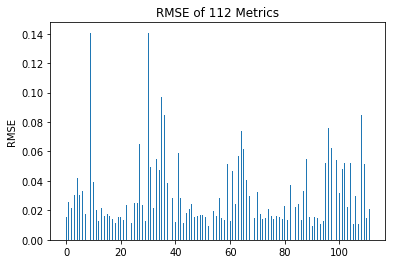

In [97]:
import numpy as np
import matplotlib.pyplot as plt


N = 112
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, np.sqrt(np.mean(np.square(y_pred -X_testV),axis=0)), width)

#Showing which metrics are more difficult to acquire
plt.ylabel('RMSE')
plt.title('RMSE of 112 Metrics')

plt.savefig('RMSE_metrics.png', bbox_inches='tight')
plt.show()


In [94]:
rmse_vals = np.sqrt(np.mean(np.square(y_pred -X_testV),axis=0))

In [93]:
#histogram of different metrics
#RMSE shows that there is around a 1% error in predicting V100 metrics from P100 data